In [44]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
# Download tokenizer
nltk.download('punkt')
from nltk.corpus import stopwords
import string
# Download stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import gradio as gr

[nltk_data] Downloading package punkt to C:\Users\DELL/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
file_path = r'C:\Users\DELL\OneDrive\Desktop\CLOUD\Document_Classifier_Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')  # or try 'iso-8859-1', 'cp1252', etc.


In [3]:
df

,ï»¿ID,Text,Category
0,1,Abstract: Wish up music want go prove happy. V...,Scientific
1,2,"This agreement is made between Grimes, Kaufman...",Legal
2,3,I recently purchased land and it exceeded my e...,E-commerce
3,4,This agreement is made between Brown PLC and V...,Legal
4,5,I recently purchased wrong and it was disappoi...,E-commerce
...,...,...,...
2995,2996,This agreement is made between Horton PLC and ...,Legal
2996,2997,Issue stuff direction shoulder great situation...,Blog
2997,2998,Night activity city serve sound. Performance n...,News
2998,2999,I recently purchased phone and it exceeded my ...,E-commerce


In [4]:
df.info

<bound method DataFrame.info of       ï»¿ID                                               Text    Category
0         1  Abstract: Wish up music want go prove happy. V...  Scientific
1         2  This agreement is made between Grimes, Kaufman...       Legal
2         3  I recently purchased land and it exceeded my e...  E-commerce
3         4  This agreement is made between Brown PLC and V...       Legal
4         5  I recently purchased wrong and it was disappoi...  E-commerce
...     ...                                                ...         ...
2995   2996  This agreement is made between Horton PLC and ...       Legal
2996   2997  Issue stuff direction shoulder great situation...        Blog
2997   2998  Night activity city serve sound. Performance n...        News
2998   2999  I recently purchased phone and it exceeded my ...  E-commerce
2999   3000  Abstract: Majority surface fall. We who east t...  Scientific

[3000 rows x 3 columns]>

In [5]:
df.isnull()

,ï»¿ID,Text,Category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [6]:
df.columns.tolist()

['ï»¿ID', 'Text', 'Category']

In [7]:
df.shape

(3000, 3)

In [8]:
df.dtypes

ï»¿ID        int64
Text        object
Category    object
dtype: object

*EXPLORING CATEGORICAL COLUMN*

In [9]:
# Unique values in the 'category' column
unique_categories = df['Category'].unique()
print(f"Unique categories: {unique_categories}")


Unique categories: ['Scientific' 'Legal' 'E-commerce' 'News' 'Blog']


In [10]:
# Display unique categories and their counts
category_counts = df['Category'].value_counts()
print(category_counts)


Category
Legal         627
Scientific    618
News          608
E-commerce    594
Blog          553
Name: count, dtype: int64


In [11]:
# Percentage distribution of categories
category_percentage = df['Category'].value_counts(normalize=True) * 100
print(category_percentage)


Category
Legal         20.900000
Scientific    20.600000
News          20.266667
E-commerce    19.800000
Blog          18.433333
Name: proportion, dtype: float64


*VISUALIZATION CATEGORICAL COLUMN*

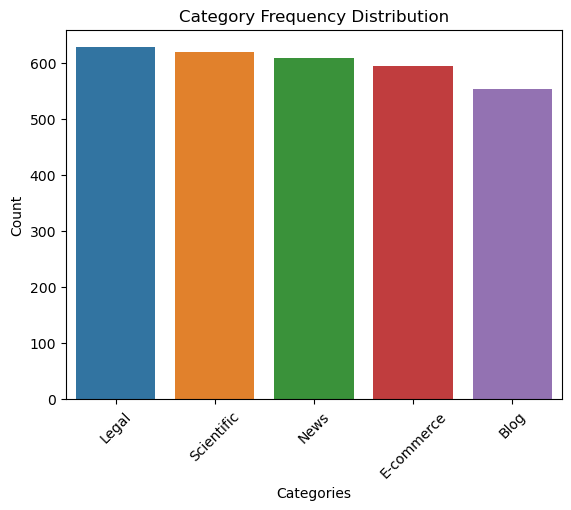

In [ ]:
# Bar plot for categories
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Frequency Distribution')
plt.xticks(rotation=45)
plt.show()


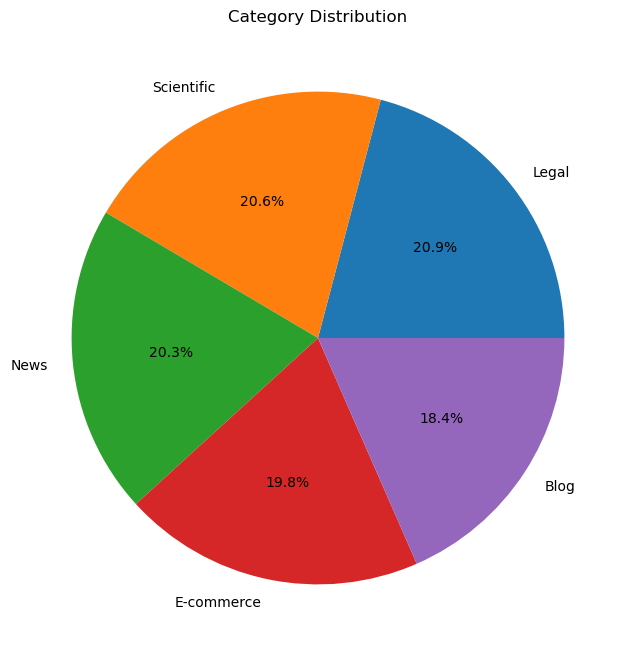

In [13]:
# Pie chart for category distribution
category_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Category Distribution')
plt.ylabel('')  # Remove y-label for better visuals
plt.show()


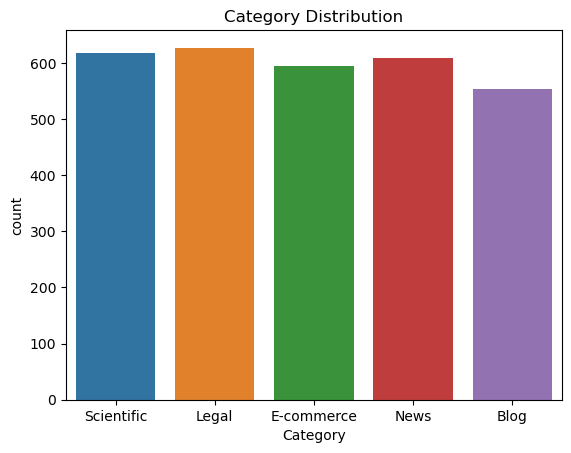

In [ ]:
# Count plot for category column to check class distribution
sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


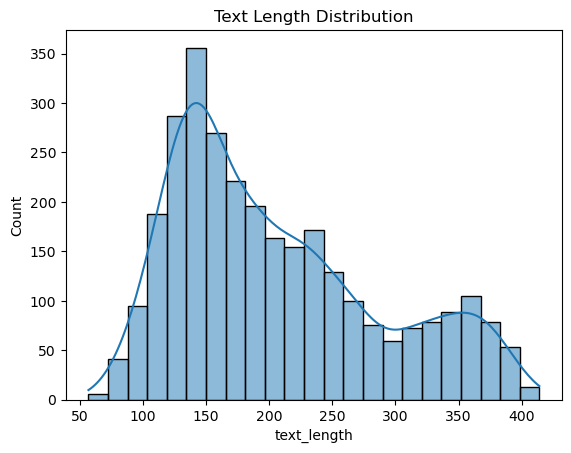

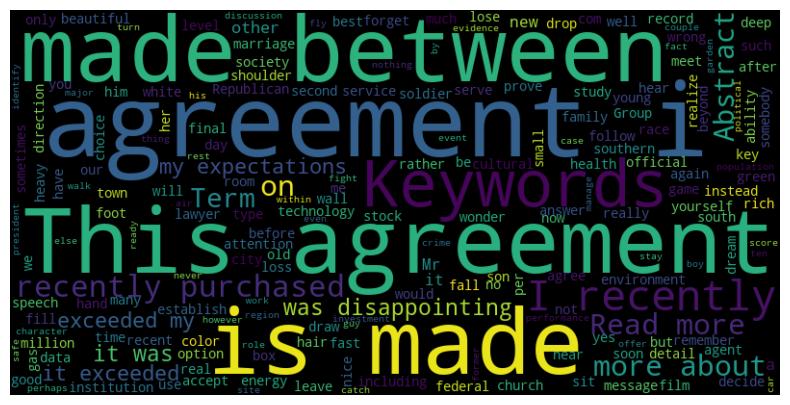

In [15]:
# Checking the length of text in each document
df['text_length'] = df['Text'].apply(len)
sns.histplot(df['text_length'], kde=True)
plt.title('Text Length Distribution')
plt.show()

# Word Cloud to visualize the most frequent words in the text column
from wordcloud import WordCloud

text = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, stopwords=['the', 'and', 'to', 'of', 'in']).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [16]:
# Average text length grouped by category
df['text_length'] = df['Text'].apply(len)
avg_text_length = df.groupby('Category')['text_length'].mean()
print(avg_text_length)


Category
Blog          141.992767
E-commerce    129.244108
Legal         224.645933
News          183.766447
Scientific    337.053398
Name: text_length, dtype: float64


In [ ]:
# Find most frequent words in each category
for category in unique_categories:
    category_text = ' '.join(df[df['Category'] == category]['Text'])
    word_counts = Counter(category_text.split())
    print(f"Most common words for {category}: {word_counts.most_common(10)}")


Most common words for Scientific: [('Abstract:', 618), ('Keywords:', 618), ('Republican', 35), ('stock', 35), ('keep', 31), ('real', 29), ('study', 29), ('recently', 29), ('property', 29), ('technology', 28)]
Most common words for Legal: [('and', 1086), ('agreement', 635), ('between', 634), ('This', 630), ('is', 627), ('made', 627), ('Terms:', 627), ('Inc.', 45), ('LLC', 41), ('Inc', 40)]
Most common words for E-commerce: [('I', 601), ('and', 601), ('recently', 596), ('it', 596), ('purchased', 594), ('was', 306), ('disappointing.', 306), ('my', 294), ('exceeded', 288), ('expectations.', 288)]
Most common words for News: [('score', 24), ('Congress', 23), ('lose', 23), ('case', 23), ('rich', 22), ('along', 20), ('teacher', 20), ('follow', 20), ('others', 20), ('indicate', 19)]
Most common words for Blog: [('more', 561), ('about', 560), ('on', 557), ('Read', 553), ('discussion', 14), ('film', 13), ('take', 13), ('small', 13), ('past', 13), ('somebody', 13)]


In [ ]:
# Encode the category column
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Category'])
print(df[['Category', 'category_encoded']].head())


     Category  category_encoded
0  Scientific                 4
1       Legal                 2
2  E-commerce                 1
3       Legal                 2
4  E-commerce                 1


In [19]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Category'])
print(df_encoded.head())


   ï»¿ID                                               Text  text_length  \
0      1  Abstract: Wish up music want go prove happy. V...          339   
1      2  This agreement is made between Grimes, Kaufman...          194   
2      3  I recently purchased land and it exceeded my e...           93   
3      4  This agreement is made between Brown PLC and V...          257   
4      5  I recently purchased wrong and it was disappoi...           96   

   category_encoded  Category_Blog  Category_E-commerce  Category_Legal  \
0                 4          False                False           False   
1                 2          False                False            True   
2                 1          False                 True           False   
3                 2          False                False            True   
4                 1          False                 True           False   

   Category_News  Category_Scientific  
0          False                 True  
1          F

In [ ]:
# Set download directory and append it to NLTK's data path
nltk.download('punkt', download_dir='C:\\Users\\DELL\\nltk_data')
nltk.data.path.append('C:\\Users\\DELL\\nltk_data')

# Example text
example_text = ("Abstract: Wish up music want go prove happy. Various information begin wear. "
                "Decision speech attention do plan building mission. Building collection from speak "
                "difference worry approach. Source rock business side before green. Structure section "
                "wish network. Remember material none particularly. Keywords: thus, join, fish, scene, national")

# Tokenization
try:
    print("Original Text:", example_text)
    print("Tokenized Text:", word_tokenize(example_text))
except LookupError as e:
    print(f"Error: {e}")
    print("Make sure 'punkt' is downloaded and in the correct directory.")


[nltk_data] Downloading package punkt to C:\Users\DELL\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Original Text: Abstract: Wish up music want go prove happy. Various information begin wear. Decision speech attention do plan building mission. Building collection from speak difference worry approach. Source rock business side before green. Structure section wish network. Remember material none particularly. Keywords: thus, join, fish, scene, national
Tokenized Text: ['Abstract', ':', 'Wish', 'up', 'music', 'want', 'go', 'prove', 'happy', '.', 'Various', 'information', 'begin', 'wear', '.', 'Decision', 'speech', 'attention', 'do', 'plan', 'building', 'mission', '.', 'Building', 'collection', 'from', 'speak', 'difference', 'worry', 'approach', '.', 'Source', 'rock', 'business', 'side', 'before', 'green', '.', 'Structure', 'section', 'wish', 'network', '.', 'Remember', 'material', 'none', 'particularly', '.', 'Keywords', ':', 'thus', ',', 'join', ',', 'fish', ',', 'scene', ',', 'national']


In [ ]:
# Example of tokenizing the first row
print("\nTokenized Example:")
example_text = df['Text'].iloc[0]
print("Original Text:", example_text)
print("Tokenized Text:", word_tokenize(example_text))


[nltk_data] Downloading package punkt to C:\Users\DELL/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.



Tokenized Example:
Original Text: Abstract: Wish up music want go prove happy. Various information begin wear. Decision speech attention do plan building mission.
Building collection from speak difference worry approach. Source rock business side before green. Structure section wish network. Remember material none particularly. Keywords: thus, join, fish, scene, national
Tokenized Text: ['Abstract', ':', 'Wish', 'up', 'music', 'want', 'go', 'prove', 'happy', '.', 'Various', 'information', 'begin', 'wear', '.', 'Decision', 'speech', 'attention', 'do', 'plan', 'building', 'mission', '.', 'Building', 'collection', 'from', 'speak', 'difference', 'worry', 'approach', '.', 'Source', 'rock', 'business', 'side', 'before', 'green', '.', 'Structure', 'section', 'wish', 'network', '.', 'Remember', 'material', 'none', 'particularly', '.', 'Keywords', ':', 'thus', ',', 'join', ',', 'fish', ',', 'scene', ',', 'national']


In [ ]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Function for stop-word removal
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# Apply stop-word removal to tokenized text
example_tokens = word_tokenize(example_text)
filtered_tokens = remove_stopwords(example_tokens)
print("\nStop-word Removal Example:")
print("After Stop-word Removal:", filtered_tokens)



Stop-word Removal Example:
After Stop-word Removal: ['Abstract', 'Wish', 'music', 'want', 'go', 'prove', 'happy', 'Various', 'information', 'begin', 'wear', 'Decision', 'speech', 'attention', 'plan', 'building', 'mission', 'Building', 'collection', 'speak', 'difference', 'worry', 'approach', 'Source', 'rock', 'business', 'side', 'green', 'Structure', 'section', 'wish', 'network', 'Remember', 'material', 'none', 'particularly', 'Keywords', 'thus', 'join', 'fish', 'scene', 'national']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Download WordNet
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Example of lemmatization
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("\nLemmatization Example:")
print("Lemmatized Tokens:", lemmatized_tokens)


[nltk_data] Downloading package wordnet to C:\Users\DELL/nltk_data...



Lemmatization Example:
Lemmatized Tokens: ['Abstract', 'Wish', 'music', 'want', 'go', 'prove', 'happy', 'Various', 'information', 'begin', 'wear', 'Decision', 'speech', 'attention', 'plan', 'building', 'mission', 'Building', 'collection', 'speak', 'difference', 'worry', 'approach', 'Source', 'rock', 'business', 'side', 'green', 'Structure', 'section', 'wish', 'network', 'Remember', 'material', 'none', 'particularly', 'Keywords', 'thus', 'join', 'fish', 'scene', 'national']


In [24]:
# Function to preprocess text
def preprocess_text(text, use_stemming=True):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stop-words and punctuation
    tokens = remove_stopwords(tokens)
    # Apply stemming or lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Combine tokens back into a string
    return " ".join(tokens)

# Apply preprocessing to the dataset
df['processed_text'] = df['Text'].apply(lambda x: preprocess_text(x, use_stemming=False))

print("\nDataset After Preprocessing:")
print(df[['Text', 'processed_text']].head())



Dataset After Preprocessing:
                                                Text  \
0  Abstract: Wish up music want go prove happy. V...   
1  This agreement is made between Grimes, Kaufman...   
2  I recently purchased land and it exceeded my e...   
3  This agreement is made between Brown PLC and V...   
4  I recently purchased wrong and it was disappoi...   

                                      processed_text  
0  abstract wish music want go prove happy variou...  
1  agreement made grime kaufman armstrong martin-...  
2  recently purchased land exceeded expectation a...  
3  agreement made brown plc vance group term enou...  
4  recently purchased wrong disappointing whateve...  


In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text'])

print("\nTF-IDF Vectorization Complete")
print("Feature Names (Top 10):", vectorizer.get_feature_names_out()[:10])



TF-IDF Vectorization Complete
Feature Names (Top 10): ['abbott' 'ability' 'able' 'abstract' 'accept' 'according' 'account'
 'acevedo' 'across' 'act']


In [47]:
from sklearn.decomposition import TruncatedSVD

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text'])

print("\nTF-IDF Vectorization Complete")
print("Feature Names (Top 10):", vectorizer.get_feature_names_out()[:10])

# Apply Latent Semantic Analysis (LSA)
n_topics = 2  # Define the number of topics you want to extract
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Show the LSA topics (terms for each topic)
terms = vectorizer.get_feature_names_out()

# Print the top words for each topic
for i, topic in enumerate(lsa_model.components_):
    print(f"\nTopic {i + 1}:")
    print([terms[j] for j in topic.argsort()[-5:]])  # Show top 5 words for each topic



TF-IDF Vectorization Complete
Feature Names (Top 10): ['abbott' 'ability' 'able' 'abstract' 'accept' 'according' 'account'
 'acevedo' 'across' 'act']

Topic 1:
['disappointing', 'expectation', 'exceeded', 'purchased', 'recently']

Topic 2:
['disappointing', 'expectation', 'exceeded', 'recently', 'purchased']


In [26]:
# Split data into training and testing sets
y = df['Category']  # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Split Complete:")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")



Data Split Complete:
Training Data Shape: (2400, 1714)
Testing Data Shape: (600, 1714)


In [ ]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))



Model Evaluation:
              precision    recall  f1-score   support

        Blog       0.98      1.00      0.99       118
  E-commerce       1.00      1.00      1.00       119
       Legal       1.00      1.00      1.00       131
        News       1.00      0.98      0.99       131
  Scientific       1.00      1.00      1.00       101

    accuracy                           0.99       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      0.99      1.00       600



In [ ]:
# Define the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver supporting l1 and l2 penalties
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("\nBest Parameters:")
print(grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Use the best model to make predictions
best_logistic_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_logistic_model.predict(X_test)

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))



Best Parameters:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 100.00%

Classification Report on Test Set:
              precision    recall  f1-score   support

        Blog       1.00      1.00      1.00       118
  E-commerce       1.00      1.00      1.00       119
       Legal       1.00      1.00      1.00       131
        News       1.00      1.00      1.00       131
  Scientific       1.00      1.00      1.00       101

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [41]:
import gradio as gr

# Gradio Function for Prediction
def predict_category(input_text):
    input_vector = vectorizer.transform([input_text])  # Vectorize user input
    prediction = model.predict(input_vector)          # Predict category
    return f"Predicted Category: {prediction[0]}"

# Gradio UI
description = """
# Text Document Classifier
Enter text to classify it into one of the predefined categories.
"""

ui = gr.Interface(
    fn=predict_category,
    inputs=gr.Textbox(lines=5, label="Enter Text"),
    outputs=gr.Textbox(label="Prediction"),
    title="INTELLIGENT DOCUMENT CLASSIFIER",
    description=description
)

# Launch the Gradio App
if __name__ == "__main__":
    ui.launch(share = True)


* Running on local URL:  http://127.0.0.1:7866
* Running on public URL: https://5e3032c542a7da16e1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
